**Material obtenido del ramo IIC2413 - Bases de Datos, semestre 2018-2, profesor Adrián Soto**

- [2019-2] Ampliado por Felipe Barrientos y Joaquín Eichholz para el ramo IIC2433 - Minería de datos
- [2020-2] Ampliado por Sebastián Ricke y Federico Taladriz para el mismo curso.
- [2021-2] Adaptado por Hernan Sazo para el mismo ramo.
- [2022-1] Adaptado con cariño por Daniela Concha ✨.

<br>

---

# Análisis de datos con Python

En esta ayudantía veremos la herramienta de análisis de datos `Pandas`. Esta herramienta es una librería que permite hacer análisis y limpieza de datos en Python. Está diseñada para trabajar con datos tabulares y heterogéneos. También es utilizada en conjunto con otras herramientas para hacer _Data Science_ como `NumPy`, `SciPy`, `matplotlib` y `scikit-learn`. El objetivo de esta ayudantía es tener nociones básicas de la librería `pandas`.


### Requisitos

Para esta clase vamos a utilizar Python3 y algunas librerías externas. Las vamos a instalar utilizando pip:

In [1]:
!pip3 install --upgrade jupyter numpy pandas

## 1. Numpy

`NumPy` es una librería para hacer computos numéricos en Python. Es la base de muchas otras librerías científicas. Entre otras cosas, nos permite:

- Utilizar arreglos multidimensionales.
- Utilizar funciones matemáticas.
- Utilizar herramientas de álgebra lineal.

Necesitamos conocer esta librería (en concreto, el manejo de arreglos) para poder entender el funcionamiento de `pandas`. Para comenzar a trabajar vamos a importar la librería y crear un pequeño arreglo de elementos aleatorios.

In [2]:
import numpy as np

data = np.random.randn(2,4)
data

array([[-0.16372449, -0.23702125, -2.9133427 , -1.78558632],
       [ 0.30350197, -0.29293238, -0.88111945, -1.04594921]])

A diferencia de una lista, podemos hacer operaciones matriciales, como multiplicar el arreglo `data` por un escalar:

In [3]:
data * 10

array([[ -1.63724486,  -2.37021245, -29.13342705, -17.8558632 ],
       [  3.03501974,  -2.92932377,  -8.81119447, -10.45949206]])

o sumarle una matriz:

In [4]:
data + data

array([[-0.32744897, -0.47404249, -5.82668541, -3.57117264],
       [ 0.60700395, -0.58586475, -1.76223889, -2.09189841]])

### 1.1 Crear arreglos

Podemos crear arreglos a partir de una lista:

In [5]:
list1 = [1, 1, 2, 3, 5]
arr1 = np.array(list1)
arr1

array([1, 1, 2, 3, 5])

In [6]:
list2 = [[1, 1, 2, 3], [5, 8, 13, 21]]
arr2 = np.array(list2)
arr2

array([[ 1,  1,  2,  3],
       [ 5,  8, 13, 21]])

Para preguntar el número de dimensiones en un arreglo utilizamos `ndim`. Para preguntar los tamaños de cada una de esas dimensiones utilizamos `shape` (por ejemplo, pensar en arr2 como una matriz de 2 x 4).

In [7]:
arr2.ndim

2

In [8]:
arr2.shape

(2, 4)

### 1.2 Accediendo a elementos

Para obtener un elemento:

In [9]:
arr1[2]

2

In [10]:
arr2[1][2]

13

In [11]:
# Podemos acceder de esta forma también.
arr2[1, 2]

13

Los arreglos son mutables:

In [12]:
arr1[3] = 300
arr1

array([  1,   1,   2, 300,   5])

In [13]:
arr2[1, 2] = 100
arr2

array([[  1,   1,   2,   3],
       [  5,   8, 100,  21]])

### 1.3 Función `arange`

También tenemos un equivalente a `range` llamado `arange`, pero que genera un arreglo.

In [14]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### 1.4 Operaciones sobre arreglos

Tenemos todo el álgebra lineal a nuestra disposición. Por ejemplo, acá hay algunas operaciones que se pueden hacer sobre un arreglo:

In [15]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [16]:
arr * arr

array([[ 1,  4,  9, 16],
       [25, 36, 49, 64]])

In [17]:
arr + 1

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [18]:
(arr + 1) - arr

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

In [19]:
1 / arr

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.2       , 0.16666667, 0.14285714, 0.125     ]])

In [20]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712]])

### 1.5 _Slices_

Podemos extraer partes de un arreglo tal como en las listas. También podemos usar esto para cambiar los valores de dichos elementos.

In [21]:
arr = np.arange(3,15)
arr

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [22]:
arr[3:6]

array([6, 7, 8])

In [23]:
arr[3:6] = 1
arr

array([ 3,  4,  5,  1,  1,  1,  9, 10, 11, 12, 13, 14])

### 1.6 Indexando con booleanos

Podemos utilizar comparaciones booleanas con los arreglos:

In [24]:
arr = np.array([0, 0, 1, 1, 2, 2])
arr == 1

array([False, False,  True,  True, False, False])

El resultado de esta comparación punto a punto es un arreglo de valores booleanos. Este arreglo se puede usar para acceder a valores en otros arreglos, de forma que solo nos quedamos con los valores indicados como `true`. 

Vamos a crear un arreglo multidimensional e ingresar el arreglo anterior como índice:

In [25]:
arr2 = np.random.randn(6, 3)
arr2

array([[-1.22275632, -0.07355973,  0.72815368],
       [-0.2106568 , -1.06785985, -1.01287005],
       [-0.15855812,  1.35615884,  1.14451114],
       [ 0.656828  , -1.06972266,  0.03649552],
       [-1.36484095, -0.22845406,  0.02106303],
       [ 0.60262351,  0.10479737,  1.54194281]])

In [26]:
arr2[arr == 1]

array([[-0.15855812,  1.35615884,  1.14451114],
       [ 0.656828  , -1.06972266,  0.03649552]])

Y también podemos negar la condición:

In [27]:
arr2[~(arr == 1)]

array([[-1.22275632, -0.07355973,  0.72815368],
       [-0.2106568 , -1.06785985, -1.01287005],
       [-1.36484095, -0.22845406,  0.02106303],
       [ 0.60262351,  0.10479737,  1.54194281]])

Además, podemos utilizar distintos tipos de operaciones _bitwise_ como el _and_ (`&`), _or_ (`|`), _xor_ (`^`) y el _not_ (`~`).

### 1.7 Transponer un arreglo

Es posible obtener la transpuesta de un arreglo rápidamente.

In [28]:
arr = np.random.randn(6, 3)
arr

array([[ 4.54174301e-05,  1.36054893e+00,  6.48116366e-01],
       [-1.19806359e+00, -1.06600059e+00,  3.48552635e-01],
       [-1.41640217e+00,  9.24859518e-01,  1.55910966e+00],
       [-1.13050675e+00,  8.64458430e-01,  5.94954617e-01],
       [-3.15662356e-01,  2.60212299e-01, -1.12941380e-01],
       [-1.42385420e+00,  2.90829323e-01, -7.56675100e-01]])

In [29]:
arr.T

array([[ 4.54174301e-05, -1.19806359e+00, -1.41640217e+00,
        -1.13050675e+00, -3.15662356e-01, -1.42385420e+00],
       [ 1.36054893e+00, -1.06600059e+00,  9.24859518e-01,
         8.64458430e-01,  2.60212299e-01,  2.90829323e-01],
       [ 6.48116366e-01,  3.48552635e-01,  1.55910966e+00,
         5.94954617e-01, -1.12941380e-01, -7.56675100e-01]])

### 1.8 Otras funciones

Tenemos acceso a algunas funciones de estadística básicas. Por ejemplo `sum`, `mean` y `std` nos permiten respectivamente sacar la suma, el promedio y la desviación estándar de un arreglo.

In [30]:
arr = np.random.randn(10)
arr

array([ 0.91414315,  1.67435465,  1.48323685,  2.10406265,  0.86733864,
        0.46520432,  0.14031376, -0.7391447 ,  0.42210877, -1.07441096])

In [31]:
arr.sum()

6.257207136293712

In [32]:
arr.mean()

0.6257207136293712

In [33]:
arr.std()

0.9601133905163438

También podemos ordenar:

In [34]:
arr.sort()
arr

array([-1.07441096, -0.7391447 ,  0.14031376,  0.42210877,  0.46520432,
        0.86733864,  0.91414315,  1.48323685,  1.67435465,  2.10406265])

Y pedir elementos distintos:

In [35]:
arr = np.array([0, 0, 1, 1, 2, 2])
np.unique(arr)

array([0, 1, 2])

## 2. Pandas

Para comenzar con `pandas` estudiaremos los tipos `Series` y `DataFrame`. Partimos importando la librería:

In [36]:
import pandas as pd

### 2.1 Series

Vamos a partir instanciando objetos de tipo `Series`. Estos objetos son como arreglos unidimensionales, solo que su índice es más explícito.

In [37]:
obj = pd.Series([1, 3, -4, 7])
obj

0    1
1    3
2   -4
3    7
dtype: int64

Para un objeto de tipo `Series` podemos agregar un label a sus índices.

In [38]:
obj = pd.Series([1, 3, -4, 7], index=['d', 'c', 'b', 'a'])
obj

d    1
c    3
b   -4
a    7
dtype: int64

In [39]:
obj['c']

3

Podemos seleccionar varios elementos según el label de su índice o si posición.

In [40]:
obj[['c', 'a']]

c    3
a    7
dtype: int64

In [41]:
obj[[0, 2]]

d    1
b   -4
dtype: int64

Podemos hacer filtros pasando un arreglo de _booleanos_:

In [42]:
obj[obj > 2]

c    3
a    7
dtype: int64

Recordemos lo que significaba la comparación `obj > 2` en `NumPy`. Esta comparación era una arreglo con el mismo largo que `obj` que tenía el valor `True` en todas las posiciones con valor mayor a 2.

In [43]:
obj > 2

d    False
c     True
b    False
a     True
dtype: bool

Por lo que en `obj[obj > 2]` se muestran sólo las filas en la que el arreglo anterior era `True`.

Finalmente, podemos crear un objeto `Series` a partir de un diccionario. Supongamos el siguiente diccionario de personas junto a su edad.

In [66]:
people = {'Alice': 20, 'Bob': 17, 'Charles': 23, 'Dino': 50}
people_series = pd.Series(people)

print('-' * 20)
print(people_series)
print('-' * 20)
people_series[people_series > 17]

--------------------
Alice      20
Bob        17
Charles    23
Dino       50
dtype: int64
--------------------


Alice      20
Charles    23
Dino       50
dtype: int64

¿Qué pasa si queremos filtrar por ciertos nombres pero algunos no existen?

In [45]:
# Esto va a arrojar error en el futuro.
people_series[['Bob', 'Dino', 'Edward']]

KeyError: ignored

### 2.2 DataFrame

Un objeto de tipo `DataFrame` representa una tabla, en que cada una de sus columnas representa un tipo. Vamos a construir una tabla a partir de un diccionario.

In [46]:
reg_chile = {'name': ['Metropolitana', 'Valparaiso', 'Biobío', 'Maule', 'Araucanía', 'O\'Higgins'],
             'pop': [7112808, 1815902, 1538194, 1044950, 957224, 914555],
             'pib': [24850, 14510, 13281, 12695, 11064, 14840]}
frame = pd.DataFrame(reg_chile)
frame

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064
5,O'Higgins,914555,14840


Podemos usar la función `head` para tener sólo las 5 primeras columnas del Data Frame. En este caso no es mucho aporte, pero para un Data Frame más grande no puede servir para ver cómo vienen los datos.

In [47]:
frame.head()

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064


Podemos proyectar valores pasando el nombre de las columnas que deseamos dejar.

In [48]:
frame[['name']]

,name
0,Metropolitana
1,Valparaiso
2,Biobío
3,Maule
4,Araucanía
5,O'Higgins


In [49]:
frame[['name', 'pop']]

,name,pop
0,Metropolitana,7112808
1,Valparaiso,1815902
2,Biobío,1538194
3,Maule,1044950
4,Araucanía,957224
5,O'Higgins,914555


Podemos seleccionar una determinada fila con la función `iloc`.

In [50]:
frame.iloc[2]

name     Biobío
pop     1538194
pib       13281
Name: 2, dtype: object

Podemos utilizar la misma idea de filtros vista anteriormente. Por ejemplo, vamos a dejar sólamente las columnas con población mayor a 1.000.000. ¿Te suena esto a algún otro lenguaje que viste este semestre?

In [51]:
frame[frame['pop'] > 1000000]

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695


Podemos hacer filtros con `&` para hacer un `AND`:

In [52]:
frame[(frame['pop'] > 1000000) & (frame['pib'] < 20000)]

,name,pop,pib
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695


Y podemos usar `|` para hacer un `OR`:

In [53]:
frame[(frame['name'] == 'Metropolitana') | (frame['name'] == 'Valparaiso')]

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510


Existen muchas formas de crear y operar sobre un `DataFrame`. Puedes revisar la documentación para encontrar más.

### 2.3 Orden sobre un Data Frame

Para ordenar un objeto `DataFrame` usamos la función `sort_values`:

In [54]:
frame.sort_values(by='pib')

,name,pop,pib
4,Araucanía,957224,11064
3,Maule,1044950,12695
2,Biobío,1538194,13281
1,Valparaiso,1815902,14510
5,O'Higgins,914555,14840
0,Metropolitana,7112808,24850


Si necesitamos ordenar por más de una columna, podemos pasar un arreglo al argumento `by`.

### 2.4 Describiendo los datos

La librería `pandas` tiene varias funciones que nos permiten obtener descripciones y resúmenes de los datos. Vamos a ver algunos ejemplos.

In [55]:
frame.dtypes

name    object
pop      int64
pib      int64
dtype: object

In [56]:
frame.describe()

,pop,pib
count,6.000000e+00,6.000000
mean,2.230606e+06,15206.666667
std,2.418536e+06,4915.119843
min,9.145550e+05,11064.000000
25%,9.791555e+05,12841.500000
50%,1.291572e+06,13895.500000
75%,1.746475e+06,14757.500000
max,7.112808e+06,24850.000000


In [57]:
frame.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


pop    2.230606e+06
pib    1.520667e+04
dtype: float64

In [58]:
frame.sum()

name    MetropolitanaValparaisoBiobíoMauleAraucaníaO'H...
pop                                              13383633
pib                                                 91240
dtype: object

### 2.5 Utilizando datos externos

En `pandas` es posible importar datos en formato `.csv`, `.xlsx` entre otros. Veamos cómo cargar de forma manual los datos de un archivo CSV, para esto utilizaremos el [siguiente archivo](https://docs.google.com/spreadsheets/d/1TzI3bve5jUkauZ95_rTZjx3rQT4IGQAQ0zoZG4qlyfE/edit?usp=sharing).

In [59]:
pets = pd.read_csv('/content/pets.csv')
pets

,Nombre,Edad,Especie,Característica,Sexo
0,Luna,4,Gato,Tuxedo,M
1,Pepa,60,Tortuga,De tierra,M
2,Cachirulo,1,Gato,Romano,H
3,Gasparcito,15,Perro,Poodle,H
4,Pebre,1,Gato,Blanco con manchas cafes,M
5,Merken,2,Gato,Naranjo,H
6,Benito,2,Gato,Gris con negro,H
7,Clarita,20,Gato,Romano,M
8,Negrito,7,Perro,Salchicha,H
9,Luna,9,Perro,Blanco,M


In [60]:
pets.dtypes

Nombre            object
Edad               int64
Especie           object
Característica    object
Sexo              object
dtype: object

In [61]:
pets.describe()

,Edad
count,10.000000
mean,12.100000
std,18.002778
min,1.000000
25%,2.000000
50%,5.500000
75%,13.500000
max,60.000000


### 2.6 Agregación

Vamos a ver unos ejemplos para agregar datos utilizando `pandas`. 

Obtengamos la edad promedio por país.

In [62]:
pets.groupby('Especie').mean()

,Edad
Especie,
Gato,5.000000
Perro,10.333333
Tortuga,60.000000


Podemos preguntar cuantos elementos hay por grupo. En este caso obtendríamos el número de personasn por país.

In [63]:
pets.groupby('Especie').size() # Ojo! esto retorna un objeto Series

Especie
Gato       6
Perro      3
Tortuga    1
dtype: int64

In [71]:
grouped_pets = pd.DataFrame()
total_pets = pets.shape[0]

grouped_pets['Edad promedio'] = pets.groupby('Especie').mean()['Edad']
grouped_pets['Cantidad'] = pets.groupby('Especie').size()
grouped_pets['Porcentaje'] = grouped_pets['Cantidad'] / total_pets
grouped_pets

,Edad promedio,Cantidad,Porcentaje
Especie,,,
Gato,5.000000,6,0.6
Perro,10.333333,3,0.3
Tortuga,60.000000,1,0.1


En `pandas` se pueden hacer operaciones mucho más complejas, pero no veremos nada avanzado en esta ocasión. Puedes revisar la documentación para ver que más puedes hacer.

### 2.7 Graficando los datos

Una de las ventajas de trabajar con `pandas` es que tenemos acceso rápido a herramientas de visualización. `Pandas` nos permite realizar gráficos simples como gráficos de barra o torta. 

Para más información sobre los gráficos que puede hacer `pandas`, puedes revisar la documentación de la función [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

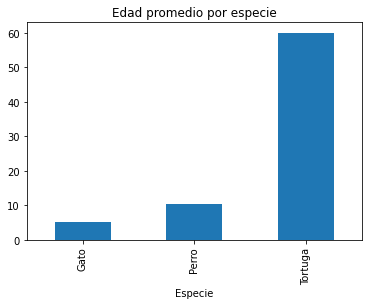

In [72]:
ax = grouped_pets['Edad promedio'].plot.bar(title='Edad promedio por especie')

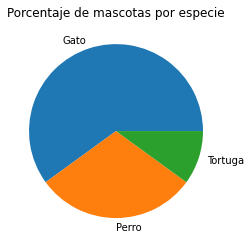

In [73]:
ax = grouped_pets['Porcentaje'].plot.pie(xlabel='', ylabel='', title='Porcentaje de mascotas por especie')

También se pueden utilizar enfocadas en realizar gráficos como `matplotlib`, `seaborn` y `altair`.

## 3. Material adicional Pandas

### 3.3 Material anterior

- Graficar datos usando distintas librerías de Python: [Ayudantía 1 - 2020-2](https://github.com/IIC2433/Syllabus-2020-2/blob/master/Ayudantías/Ayudantía%201/Ayudantia_1_programación_vectorial.ipynb) 
- Cargar datos a partir de SQL, índices jerárquicos y uso de _data join_: [Repaso DataFrames - 2021-2](https://github.com/IIC2433/Syllabus-2021-2/blob/main/Semana1/Actividad/RepasoDataFrames_Pandas.ipynb)